In [20]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

아래의 코드는 특징을 추출하는 코드이다.

위에서 잠깐 살펴본 mfcc 를 추출하는 코드가 보이고

numpy를 이용해서 특징의 width를 조절해주는 코드가 보인다.

우리가 추출하는 코드는 (40, 174) 라는 데이터 shape을 가지고 있고

이 shape은 본인이 얼마든지 조절할 수 있다.

코드 그대로 2차원으로 추출해도 되고 shape을 조절해서 1차원으로 늘어뜨려도 된다.

In [22]:
max_pad_len = 174

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e);
        return None
    
#     return padded_mfccs
    return mfccs

In [23]:
extract_feature('archive/fold7/102853-8-0-0.wav')

file name : archive/fold7/102853-8-0-0.wav
(40, 174)


array([[-2.1237451e+02, -2.0363791e+02, -2.0084283e+02, ...,
        -2.1800450e+02, -2.0519676e+02,  0.0000000e+00],
       [ 1.3029935e+02,  1.3169168e+02,  1.3549188e+02, ...,
         1.5159683e+02,  1.4182042e+02,  0.0000000e+00],
       [-1.6991680e+01, -2.5985798e+01, -3.2272266e+01, ...,
        -5.0471291e+01, -5.0113331e+01,  0.0000000e+00],
       ...,
       [-2.7312031e+00,  2.4344838e-01,  1.4779826e+00, ...,
        -8.6431274e+00, -6.3998861e+00,  0.0000000e+00],
       [-1.1409488e-01, -2.3834069e+00, -6.7361794e+00, ...,
        -5.4703627e+00, -8.8820372e+00,  0.0000000e+00],
       [-6.4407043e+00, -6.3797016e+00, -7.9611254e+00, ...,
         4.5864282e+00, -1.3598520e+00,  0.0000000e+00]], dtype=float32)

In [24]:
# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'archive/'
metadata = pd.read_csv('archive/UrbanSound8K.csv')
features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),
                'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["classID"]
    data = extract_feature(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

file name : C:\Users\hhj29\PyKOOC\archive\fold5/100032-3-0-0.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-117.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-121.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-126.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-137.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-143.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-161.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-3.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/100263-2-0-36.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/100648-1-0-0.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/100648-1-1-0.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/100648-1-2-0.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/100648-1-3-0.wav
(40, 174)
file nam

C:\Users\hhj29\Anaconda3\envs\kooc\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]


(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold7/173891-9-0-1.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold7/173891-9-0-10.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold7/173891-9-0-11.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold7/173891-9-0-17.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold7/173891-9-0-2.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold7/173891-9-0-7.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/173993-3-0-25.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/173993-3-0-39.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/173993-3-0-51.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold5/173993-3-0-52.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold4/173994-3-0-14.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold4/173994-3-0-3.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold4/173994-3-0-44.wav
(40, 174)
file n

C:\Users\hhj29\Anaconda3\envs\kooc\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
C:\Users\hhj29\Anaconda3\envs\kooc\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/88121-8-0-1.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/88121-8-0-2.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/88121-8-0-3.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/88121-8-1-0.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold10/88121-8-2-0.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold1/88466-7-0-0.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold3/88569-2-0-14.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold3/88569-2-0-21.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold3/88569-2-0-36.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold3/88569-2-0-54.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold3/88569-2-0-67.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold3/88569-2-0-77.wav
(40, 174)
file name : C:\Users\hhj29\PyKOOC\archive\fold3/88569-2-0-85.wav
(40, 174)
file name : C:\U

In [29]:
# 피클로 데이터 저장
featuresdf.to_pickle("featuresdf.pkl")

# 피클 데이터 로드
featuresdf = pd.read_pickle("featuresdf.pkl")

- 훈련(Train) 셋과 검증(Test) 셋 생성

불러온 featuresdf에서 feature는 X에 저장하였고 class_label은 y로 저장하였다.

헌데 y는 yy로 변환과정을 거쳐서 다시 저장되었다.

둘의 차이는 원-핫-인코딩의 여부이다.

원-핫-인코딩은

2라는 자연수를 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 이런식으로 변환해준다.

이렇게 변환해서 사용하는 이유는 우리가 작성할 딥러닝 모델이 멀티 클래스(10 가지) 분류를 하기 때문이다.

In [30]:
from tensorflow.keras.utils import to_categorical

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

X와 yy를 이용해서 훈련, 검증 셋을 만들기

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

* 훈련 셋과 검증 셋의 비율은 8:2로 분류됨

 아래는 데이터 셋을 검사하는 코드 (생략가능)

In [32]:
print(len(x_train))
print(len(x_test))
print(x_train.shape)
print(x_test.shape, '\n')
print(y[:10])
print(yy[:10], '\n\n')
print(y_test[:10])

6985
1747
(6985, 40, 174)
(1747, 40, 174) 

[3 2 2 2 2 2 2 2 2 1]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


- 마지막으로 훈련, 데이터 셋의 shape을 딥러닝 모델에 넣기 위한 모습으로 변환

In [33]:
n_columns = 174    
n_row = 40       
n_channels = 1
n_classes = 10

# input shape 조정
# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

- 딥러닝 모델 작성하기

CNN이라는 대표적인 딥러닝 모델을 사용함

In [18]:
model = keras.Sequential()

model.add(layers.Conv2D(input_shape=(n_row, n_columns, n_channels), filters=16, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 86, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 41, 64)         8

- 훈련 시키기

In [21]:
training_epochs = 15
num_batch_size = 64

learning_rate = 0.005
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=training_epochs)

Train on 6985 samples
Epoch 1/15
6985/6985 [==============================] - 21s 3ms/sample - loss: 1.2182 - accuracy: 0.5666
Epoch 2/15
6985/6985 [==============================] - 23s 3ms/sample - loss: 0.9405 - accuracy: 0.6754
Epoch 3/15
6985/6985 [==============================] - 22s 3ms/sample - loss: 0.8454 - accuracy: 0.7125
Epoch 4/15
6985/6985 [==============================] - 22s 3ms/sample - loss: 0.7576 - accuracy: 0.7489
Epoch 5/15
6985/6985 [==============================] - 22s 3ms/sample - loss: 0.7234 - accuracy: 0.7581
Epoch 6/15
6985/6985 [==============================] - 22s 3ms/sample - loss: 0.6597 - accuracy: 0.7804
Epoch 7/15
6985/6985 [==============================] - 22s 3ms/sample - loss: 0.6257 - accuracy: 0.7857
Epoch 8/15
6985/6985 [==============================] - 22s 3ms/sample - loss: 0.6109 - accuracy: 0.7989
Epoch 9/15
6985/6985 [==============================] - 22s 3ms/sample - loss: 0.5920 - accuracy: 0.7983
Epoch 10/15
6985/6985 [==========

- 훈련 history 그래프 보기

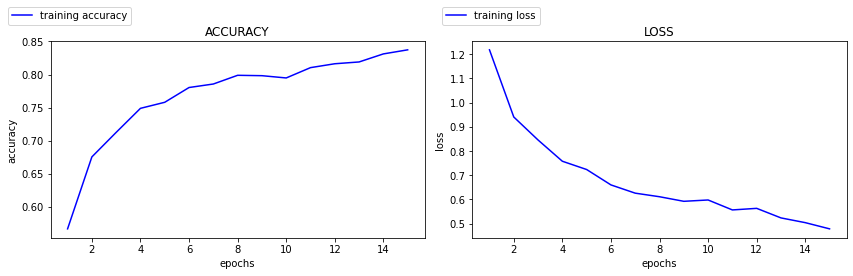

In [22]:
import matplotlib.pyplot as plt

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)

def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()
    
plot_history(history)

In [23]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
1747/1747 [==============================] - 1s 596us/sample - loss: 0.5981 - accuracy: 0.8025
test loss, test acc: [0.5980763850242121, 0.8025186]


In [37]:
model.save("saved_model.pb")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: sound_classifier_model\assets


- 텐서플로우의 고질적인 문제라는 것 같은데 메모리를 다 잡아먹고 release 하지 않는 이상한 문제가 있는 것 같다. 그래서 재 훈련을 하려고 하면 메모리 공간이 없어서 진행이 안될 수 있다. 그때는 메모리를 수동으로 해지하는 방법이 있다

In [30]:
# GPU 메모리 해제가 안될 때
#from numba import cuda 
#device = cuda.get_current_device()
#device.reset()

'''
# 모델 삭제
del model
'''

'\n# 모델 삭제\ndel model\n'